## Inspect quality data for Paxos adapter


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
import sys
sys.path.append('/data/simon/Code/MasterThesis/project/include')
import unglarer as ug
import utils as utl
import cv2
plt.rcParams['figure.figsize'] = [16, 8]


BASE_DATA_PATH = '/data/simon/ownCloud/Data/'

In [98]:
df: pd.DataFrame = pd.read_excel(BASE_DATA_PATH + 'Paxos Adapter/Patient list + Analysis Sankara Smartphone DR 4.7 - f R.xlsx', sheet_name='Paxos 4.7')
df = df.drop(['Paxos_DR', 'Paxos_Mac_Involv', 'Paxos_ONH', 'Paxos_tempinf', 'Paxos_tempsup', 'Paxos_nasalinf', 'Paxos_nasalsup', 'Paxos_seconds', 'Paxos_MW', 'Paxos_macula'], axis=1)
df = df.rename({'Eye_ID': 'eye_id', 'Pat_ID': 'pat_id', 'Paxos_sharpness': 'sharpness', 'Paxos_fovealreflex': 'foveal_reflex',
                'Paxos_reflex_artifacts': 'reflex_artifacts', 'Paxos_illumination': 'illumination'}, axis=1)
df = df.loc[~(df == '-').any(axis=1)]
df.illumination[df.illumination == 1.5] = 1.0

In [99]:
df.describe()

,eye_id,pat_id,sharpness,foveal_reflex,reflex_artifacts,illumination
count,363,363,363,363,363,363.0
unique,363,190,4,2,4,3.0
top,K010L,C006,3,0,3,3.0
freq,1,2,303,229,208,281.0


In [100]:
df.head()

,eye_id,pat_id,sharpness,foveal_reflex,reflex_artifacts,illumination
0,C001R,C001,3,0,2,3
1,C002R,C002,2,1,2,2
2,C004R,C004,2,0,2,1
3,C005R,C005,3,0,2,2
4,C006R,C006,2,0,2,1


In [101]:
qa_columns = ['sharpness', 'foveal_reflex', 'reflex_artifacts', 'illumination']
desc_df: pd.DataFrame = pd.DataFrame([pd.value_counts(df[col]) for col in qa_columns], qa_columns)
desc_df = desc_df.fillna(0)
desc_df.head()


,0.0,1.0,2.0,3.0
sharpness,2.0,13.0,45.0,303.0
foveal_reflex,229.0,134.0,0.0,0.0
reflex_artifacts,3.0,18.0,134.0,208.0
illumination,0.0,16.0,66.0,281.0


In [102]:
paths = [f for f in os.listdir(BASE_DATA_PATH + 'QA Dataset') if f.endswith('png')]
print(f'Found {len(paths)} frames in folder QA Dataset: {paths}')

path_index = sorted([p.replace('.png', '') for p in paths])
#for p in paths:
#    image_path = os.path.join(os.getcwd(), path, p)
qa_df: pd.DataFrame = df[df['eye_id'].isin(path_index)]
qa_df.head()

Found 116 frames in folder QA Dataset: ['D021R.png', 'C007R.png', 'D009R.png', 'H001L.png', 'H001R.png', 'C002L.png', 'C021L.png', 'G007L.png', 'H007R.png', 'C006L.png', 'G011L.png', 'C006R.png', 'H005L.png', 'C005L.png', 'G013R.png', 'C012R.png', 'C004R.png', 'D016R.png', 'H008R.png', 'C008R.png', 'D011L.png', 'E002R.png', 'H009L.png', 'C021R.png', 'H002R.png', 'E003L.png', 'G008L.png', 'D013R.png', 'F014L.png', 'B005R.png', 'E005R.png', 'D015R.png', 'D016L.png', 'G009L.png', 'B005L.png', 'H004R.png', 'C007L.png', 'C002R.png', 'H002L.png', 'G012L.png', 'G001R.png', 'C003L.png', 'C004L.png', 'E006L.png', 'C013L.png', 'E001L.png', 'G009R.png', 'C003R.png', 'H007L.png', 'C014L.png', 'D005L.png', 'D020R.png', 'E005L.png', 'C009R.png', 'D002L.png', 'G004L.png', 'D010R.png', 'F011R.png', 'H008L.png', 'G006L.png', 'D006R.png', 'C005R.png', 'G004R.png', 'D017L.png', 'D008L.png', 'D013L.png', 'D002R.png', 'G007R.png', 'G006R.png', 'D005R.png', 'F009R.png', 'C001L.png', 'E004L.png', 'D012L.png'

,eye_id,pat_id,sharpness,foveal_reflex,reflex_artifacts,illumination
1,C002R,C002,2,1,2,2
2,C004R,C004,2,0,2,1
3,C005R,C005,3,0,2,2
4,C006R,C006,2,0,2,1
5,C007R,C007,3,0,2,2


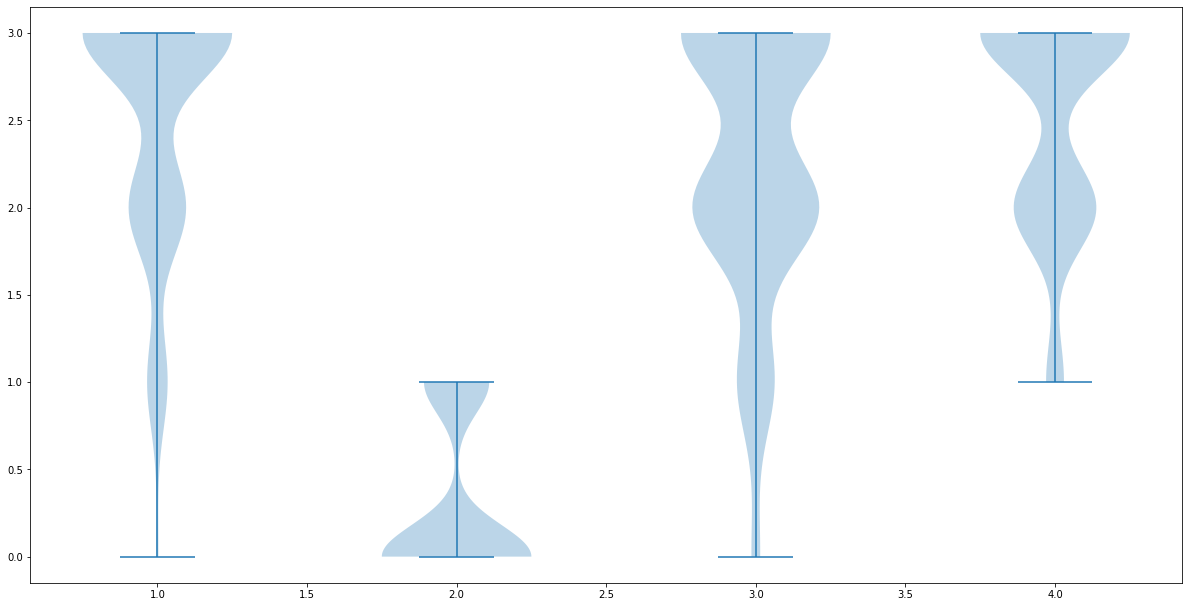

In [103]:
#color = {'boxes': 'Green', 'whiskers': 'Gray', 'medians': 'Red', 'caps': 'DarkRed'}
#qa_df.plot(kind='violin', color=color)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.violinplot([qa_df[col].to_numpy(dtype=float) for col in qa_columns])

plt.show()

In [104]:
#unglarer: ug.GlareRemover = ug.GlareRemover(masked_class=3, model_path='/data/simon/Code/MasterThesisDiabetischeRetionpathie/project/experiments/gmm_model_4.mod')
#for path in qa_df['eye_id']:
#    utl.load_image(BASE_DATA_PATH + 'QA Dataset/' + )
#    unglarer.get_glare_percentage()

In [105]:
qa_df['sharpness_predicted'] = [-1 for i in range(len(qa_df.eye_id))]
qa_df['sharpness_predicted_clahe'] = [-1 for i in range(len(qa_df.eye_id))]


for path in qa_df['eye_id']:
    img = utl.load_image(BASE_DATA_PATH + 'QA Dataset/' + path + '.png')
    img_enh = utl.enhance_contrast_image(img, clip_limit=3.5, tile_size=12)
    mask = utl.get_retina_mask(img_enh)[0]
    img = cv2.bitwise_and(img, mask)
    img_enh = cv2.bitwise_and(img_enh, mask)

    
    laplace_variance = cv2.Laplacian(img, cv2.CV_64F).var()
    laplace_variance_enh = cv2.Laplacian(img_enh, cv2.CV_64F).var()
    qa_df.loc[qa_df.eye_id == path, 'sharpness_predicted'] = laplace_variance if laplace_variance != 0.0 else None
    qa_df.loc[qa_df.eye_id == path, 'sharpness_predicted_clahe'] = laplace_variance_enh if laplace_variance != 0.0 else None
    #utl.show_image(img, name=f'Masked img, no-clahe, bluriness: {cv2.Laplacian(img, cv2.CV_64F).var()}', time=500)
    
qa_df.head()    
    

/home/simon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/simon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/C002R.png
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/C004R.png
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/C005R.png
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/C006R.png
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/C007R.png
UTIL> No mask found
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/H001R.png
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/H002R.png
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/H004R.png
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/H005R.png
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/H007R.png
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/H008R.png
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/H009R.png
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/G001R.png
UTIL> Loading picture /data/simon/ownCloud/Data/QA Dataset/G002R.png
UTIL> Loading 

,eye_id,pat_id,sharpness,foveal_reflex,reflex_artifacts,illumination,sharpness_predicted,sharpness_predicted_clahe
1,C002R,C002,2,1,2,2,39.826336,200.045811
2,C004R,C004,2,0,2,1,37.823577,125.988071
3,C005R,C005,3,0,2,2,67.985263,281.169260
4,C006R,C006,2,0,2,1,37.435252,196.878454
5,C007R,C007,3,0,2,2,NaN,NaN


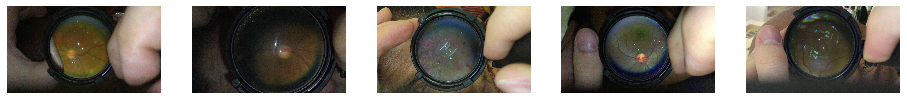

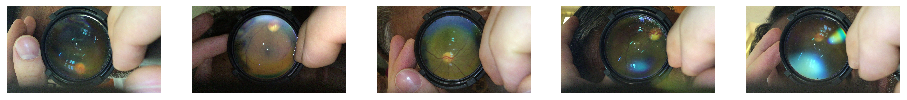

In [107]:
def showImagesHorizontally(list_of_files, title: str = 'Image row'):
    fig = plt.figure(num=title)
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        image = plt.imread(list_of_files[i])
        plt.imsave(f'{BASE_DATA_PATH}{title}_{i}.png', image)
        plt.imshow(image,cmap='Greys_r')
        plt.axis('off')

qa_df.sort_values(by='sharpness_predicted').to_excel('Paxos_adapter_sharpness_prediction.xlsx')
qa_df = qa_df.sort_values(by='sharpness_predicted')

best_five = qa_df.head(50).sample(5)['eye_id'].to_list()
worst_five = qa_df.tail(50).sample(5)['eye_id'].to_list()

best_five = [BASE_DATA_PATH + 'QA Dataset/' + p + '.png' for p in best_five]
worst_five = [BASE_DATA_PATH + 'QA Dataset/' + p + '.png' for p in worst_five]

showImagesHorizontally(best_five, title='best_five')
showImagesHorizontally(worst_five, title='worst_five')